In [45]:
pip install dash pandas plotly

Note: you may need to restart the kernel to use updated packages.


In [46]:
# import needed libraries 
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [109]:

df=pd.read_csv('../data/raw/passenger data.csv')
df

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0               0  19556  Female     Loyal Customer   52  Business travel   
1               1  90035  Female     Loyal Customer   36  Business travel   
2               2  12360    Male  disloyal Customer   20  Business travel   
3               3  77959    Male     Loyal Customer   44  Business travel   
4               4  36875  Female     Loyal Customer   49  Business travel   
...           ...    ...     ...                ...  ...              ...   
25971       25971  78463    Male  disloyal Customer   34  Business travel   
25972       25972  71167    Male     Loyal Customer   23  Business travel   
25973       25973  37675  Female     Loyal Customer   17  Personal Travel   
25974       25974  90086    Male     Loyal Customer   14  Business travel   
25975       25975  34799  Female     Loyal Customer   42  Personal Travel   

          Class  Flight Distance  Inflight wifi service  \
0           Eco              160                      5   
1      Business             2863                      1   
2           Eco              192                      2   
3      Business             3377                      0   
4           Eco             1182                      2   
...         ...              ...                    ...   
25971  Business              526                      3   
25972  Business              646                      4   
25973       Eco              828                      2   
25974  Business             1127                      3   
25975       Eco              264                      2   

       Departure/Arrival time convenient  ...  Online boarding  Seat comfort  \
0                                      4  ...                4             3   
1                                      1  ...                4             5   
2                                      0  ...                2             2   
3                                      0  ...                4             4   
4                                      3  ...                1             2   
...                                  ...  ...              ...           ...   
25971                                  3  ...                3             4   
25972                                  4  ...                4             4   
25973                                  5  ...                1             2   
25974                                  3  ...                4             4   
25975                                  5  ...                2             2   

       Inflight entertainment  On-board service  Leg room service  \
0                           5                 5                 5   
1                           4                 4                 4   
2                           2                 4                 1   
3                           1                 1                 1   
4                           2                 2                 2   
...                       ...               ...               ...   
25971                       4                 3                 2   
25972                       4                 4                 5   
25973                       2                 4                 3   
25974                       4                 3                 2   
25975                       1                 1                 2   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                     5                2                 5            5   
1                     4                3                 4            5   
2                     3                2                 2            2   
3                     1                3                 1            4   
4                     2                4                 2            4   
...                 ...              ...               ...          ...   
25971                 4                4                 5

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Unnamed: 0                         25976 non-null  int64 
 1   id                                 25976 non-null  int64 
 2   Gender                             25976 non-null  object
 3   Customer Type                      25976 non-null  object
 4   Age                                25976 non-null  int64 
 5   Type of Travel                     25976 non-null  object
 6   Class                              25976 non-null  object
 7   Flight Distance                    25976 non-null  int64 
 8   Inflight wifi service              25976 non-null  int64 
 9   Departure/Arrival time convenient  25976 non-null  int64 
 10  Ease of Online booking             25976 non-null  int64 
 11  Gate location                      25976 non-null  int64 
 12  Food

In [111]:
df.describe()

Unnamed: 0             id           Age  Flight Distance  \
count  25976.000000   25976.000000  25976.000000     25976.000000   
mean   12987.500000   65005.657992     39.620958      1193.788459   
std     7498.769632   37611.526647     15.135685       998.683999   
min        0.000000      17.000000      7.000000        31.000000   
25%     6493.750000   32170.500000     27.000000       414.000000   
50%    12987.500000   65319.500000     40.000000       849.000000   
75%    19481.250000   97584.250000     51.000000      1744.000000   
max    25975.000000  129877.000000     85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count           25976.000000                       25976.000000   
mean                2.724746                           3.046812   
std                 1.335384                           1.533371   
min                 0.000000                           0.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count            25976.000000   25976.000000    25976.000000     25976.000000   
mean                 2.756775       2.977094        3.215353         3.261665   
std                  1.412951       1.282133        1.331506         1.355536   
min                  0.000000       1.000000        0.000000         0.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         4.000000   
75%                  4.000000       4.000000        4.000000         4.000000   
max                  5.000000       5.000000        5.000000         5.000000   

       Seat comfort  Inflight entertainment  On-board service  \
count  25976.000000            25976.000000      25976.000000   
mean       3.449222                3.357753          3.385664   
std        1.320090                1.338299          1.282088   
min        1.000000                0.000000          0.000000   
25%        2.000000                2.000000          2.000000   
50%        4.000000                4.000000          4.000000   
75%        5.000000                4.000000          4.000000   
max        5.000000                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count      25976.000000      25976.000000     25976.000000      25976.000000   
mean           3.350169          3.633238         3.314175          3.649253   
std            1.318862          1.176525         1.269332          1.180681   
min            0.000000          1.000000         1.000000          0.000000   
25%            2.000000          3.000000         3.000000          3.000000   
50%            4.000000          4.000000         3.000000          4.000000   
75%            4.000000          5.000000         4.000000          5.000000   
max            5.000000          5.000000         5.000000          5.000000   

        Cleanliness  
count  25976.000000  
mean       3.286226  
std        1.319330  
min        0.000000  
25%        2.000000  
50%        3.000000  
75%        4.000000  
max        5.000000

In [6]:
df.duplicated().sum()

0

In [112]:
#drop unnecessary columns
df.drop(columns=['Unnamed: 0','id'],inplace=True)

In [113]:
df

Gender      Customer Type  Age   Type of Travel     Class  \
0      Female     Loyal Customer   52  Business travel       Eco   
1      Female     Loyal Customer   36  Business travel  Business   
2        Male  disloyal Customer   20  Business travel       Eco   
3        Male     Loyal Customer   44  Business travel  Business   
4      Female     Loyal Customer   49  Business travel       Eco   
...       ...                ...  ...              ...       ...   
25971    Male  disloyal Customer   34  Business travel  Business   
25972    Male     Loyal Customer   23  Business travel  Business   
25973  Female     Loyal Customer   17  Personal Travel       Eco   
25974    Male     Loyal Customer   14  Business travel  Business   
25975  Female     Loyal Customer   42  Personal Travel       Eco   

       Flight Distance  Inflight wifi service  \
0                  160                      5   
1                 2863                      1   
2                  192                      2   
3                 3377                      0   
4                 1182                      2   
...                ...                    ...   
25971              526                      3   
25972              646                      4   
25973              828                      2   
25974             1127                      3   
25975              264                      2   

       Departure/Arrival time convenient  Ease of Online booking  \
0                                      4                       3   
1                                      1                       3   
2                                      0                       2   
3                                      0                       0   
4                                      3                       4   
...                                  ...                     ...   
25971                                  3                       3   
25972                                  4                       4   
25973                                  5                       1   
25974                                  3                       3   
25975                                  5                       2   

       Gate location  ...  Online boarding  Seat comfort  \
0                  4  ...                4             3   
1                  1  ...                4             5   
2                  4  ...                2             2   
3                  2  ...                4             4   
4                  3  ...                1             2   
...              ...  ...              ...           ...   
25971              1  ...                3             4   
25972              4  ...                4             4   
25973              5  ...                1             2   
25974              3  ...                4             4   
25975              5  ...                2             2   

       Inflight entertainment  On-board service  Leg room service  \
0                           5                 5                 5   
1                           4                 4                 4   
2                           2                 4                 1   
3                           1                 1                 1   
4                           2                 2                 2   
...                       ...               ...               ...   
25971                       4                 3                 2   
25972                       4                 4                 5   
25973                       2                 4                 3   
25974                       4                 3                 2   
25975                       1                 1                 2   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                     5                2                 5            5   
1                     4                3                 4            5   
2        

In [114]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'satisfaction'],
      dtype='object')

In [120]:
# update columns name
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = [c.lower() for c in df.columns]


In [121]:
df

gender      customer_type  age   type_of_travel     class  \
0      Female     Loyal Customer   52  Business travel       Eco   
1      Female     Loyal Customer   36  Business travel  Business   
2        Male  disloyal Customer   20  Business travel       Eco   
3        Male     Loyal Customer   44  Business travel  Business   
4      Female     Loyal Customer   49  Business travel       Eco   
...       ...                ...  ...              ...       ...   
25971    Male  disloyal Customer   34  Business travel  Business   
25972    Male     Loyal Customer   23  Business travel  Business   
25973  Female     Loyal Customer   17  Personal Travel       Eco   
25974    Male     Loyal Customer   14  Business travel  Business   
25975  Female     Loyal Customer   42  Personal Travel       Eco   

       flight_distance  inflight_wifi_service  \
0                  160                      5   
1                 2863                      1   
2                  192                      2   
3                 3377                      0   
4                 1182                      2   
...                ...                    ...   
25971              526                      3   
25972              646                      4   
25973              828                      2   
25974             1127                      3   
25975              264                      2   

       departure/arrival_time_convenient  ease_of_online_booking  \
0                                      4                       3   
1                                      1                       3   
2                                      0                       2   
3                                      0                       0   
4                                      3                       4   
...                                  ...                     ...   
25971                                  3                       3   
25972                                  4                       4   
25973                                  5                       1   
25974                                  3                       3   
25975                                  5                       2   

       gate_location  ...  online_boarding  seat_comfort  \
0                  4  ...                4             3   
1                  1  ...                4             5   
2                  4  ...                2             2   
3                  2  ...                4             4   
4                  3  ...                1             2   
...              ...  ...              ...           ...   
25971              1  ...                3             4   
25972              4  ...                4             4   
25973              5  ...                1             2   
25974              3  ...                4             4   
25975              5  ...                2             2   

       inflight_entertainment  on-board_service  leg_room_service  \
0                           5                 5                 5   
1                           4                 4                 4   
2                           2                 4                 1   
3                           1                 1                 1   
4                           2                 2                 2   
...                       ...               ...               ...   
25971                       4                 3                 2   
25972                       4                 4                 5   
25973                       2                 4                 3   
25974                       4                 3                 2   
25975                       1                 1                 2   

       baggage_handling  checkin_service  inflight_service  cleanliness  \
0                     5                2                 5            5   
1                     4                3                 4            5   
2        

In [12]:
df.columns

Index(['id', 'gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'satisfaction'],
      dtype='object')

In [122]:
# rename columns
df.rename(columns={'departure/arrival_time_convenient':'arrival_time_convenient','on-board_service':'on_board_service'},inplace=True)

# EDA and Data visualization

In [201]:
# function to create bar chart using Plotly Express

def bar_plot(variable):
    # Count the occurrences of each unique value in the specified column
    var_value_counts = df[variable].value_counts()
    
    # Create an interactive bar plot using Plotly Express
    fig = px.bar(
        x=var_value_counts.index,
        y=var_value_counts.values,
        labels={"x": "Passengers Score", "y": "Frequency"},
        title=f"{variable} Distribution",
    )

    # Update layout of the plot
    fig.update_layout(
        xaxis_title="Passengers Score",
        yaxis_title="Frequency",
        title=f"{variable} Distribution",
    )
    fig.update_traces(marker_color = '#FFBFBF'
                 , opacity = 1)

    fig.show()
    # Print information about the variable and its value counts
    print("{}: \n {}".format(variable, var_value_counts))

In [151]:
df.columns

Index(['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service', 'arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness', 'satisfaction',
       'total_points', 'percentage'],
      dtype='object')

In [16]:
c=['inflight_wifi_service', 'arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',]

In [202]:
for i in c:
    bar_plot(i)

inflight_wifi_service: 
 2    6490
3    6317
4    4981
1    4488
5    2887
0     813
Name: inflight_wifi_service, dtype: int64


arrival_time_convenient: 
 4    6334
5    5595
3    4412
2    4343
1    3911
0    1381
Name: arrival_time_convenient, dtype: int64


ease_of_online_booking: 
 2    6030
3    5944
4    4873
1    4361
5    3573
0    1195
Name: ease_of_online_booking, dtype: int64


gate_location: 
 3    7140
4    6040
2    4837
1    4429
5    3530
Name: gate_location, dtype: int64


food_and_drink: 
 4    6204
5    5644
3    5494
2    5395
1    3214
0      25
Name: food_and_drink, dtype: int64


online_boarding: 
 4    7706
3    5313
5    5307
2    4429
1    2569
0     652
Name: online_boarding, dtype: int64


seat_comfort: 
 4    7991
5    6688
3    4632
2    3632
1    3033
Name: seat_comfort, dtype: int64


inflight_entertainment: 
 4    7368
5    6331
3    4745
2    4331
1    3197
0       4
Name: inflight_entertainment, dtype: int64


on_board_service: 
 4    7836
5    5844
3    5709
2    3670
1    2915
0       2
Name: on_board_service, dtype: int64


leg_room_service: 
 4    7097
5    6238
2    5015
3    4958
1    2542
0     126
Name: leg_room_service, dtype: int64


baggage_handling: 
 4    9378
5    6747
3    5219
2    2841
1    1791
Name: baggage_handling, dtype: int64


checkin_service: 
 4    7278
3    7007
5    5264
1    3218
2    3209
Name: checkin_service, dtype: int64


inflight_service: 
 4    9378
5    6950
3    5017
2    2851
1    1778
0       2
Name: inflight_service, dtype: int64


cleanliness: 
 4    6790
3    6065
5    5727
2    3981
1    3411
0       2
Name: cleanliness, dtype: int64


In [217]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using Plotly Express
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.index,
                y=correlation_matrix.columns,
                color_continuous_scale='burg',  # You can choose other color scales
                title="Correlation Heatmap")

# Show the plot
fig.show()

In [142]:
df['total_points']=df.inflight_wifi_service+df.arrival_time_convenient+df.ease_of_online_booking+df.gate_location+df.food_and_drink+df.online_boarding+df.seat_comfort+df.inflight_entertainment+df.on_board_service+df.leg_room_service+df.baggage_handling+df.inflight_service+df.cleanliness

In [135]:
df

gender      customer_type  age   type_of_travel     class  \
0      Female     Loyal Customer   52  Business travel       Eco   
1      Female     Loyal Customer   36  Business travel  Business   
2        Male  disloyal Customer   20  Business travel       Eco   
3        Male     Loyal Customer   44  Business travel  Business   
4      Female     Loyal Customer   49  Business travel       Eco   
...       ...                ...  ...              ...       ...   
25971    Male  disloyal Customer   34  Business travel  Business   
25972    Male     Loyal Customer   23  Business travel  Business   
25973  Female     Loyal Customer   17  Personal Travel       Eco   
25974    Male     Loyal Customer   14  Business travel  Business   
25975  Female     Loyal Customer   42  Personal Travel       Eco   

       flight_distance  inflight_wifi_service  arrival_time_convenient  \
0                  160                      5                        4   
1                 2863                      1                        1   
2                  192                      2                        0   
3                 3377                      0                        0   
4                 1182                      2                        3   
...                ...                    ...                      ...   
25971              526                      3                        3   
25972              646                      4                        4   
25973              828                      2                        5   
25974             1127                      3                        3   
25975              264                      2                        5   

       ease_of_online_booking  gate_location  ...  online_boarding  \
0                           3              4  ...                4   
1                           3              1  ...                4   
2                           2              4  ...                2   
3                           0              2  ...                4   
4                           4              3  ...                1   
...                       ...            ...  ...              ...   
25971                       3              1  ...                3   
25972                       4              4  ...                4   
25973                       1              5  ...                1   
25974                       3              3  ...                4   
25975                       2              5  ...                2   

       seat_comfort  inflight_entertainment  on_board_service  \
0                 3                       5                 5   
1                 5                       4                 4   
2                 2                       2                 4   
3                 4                       1                 1   
4                 2                       2                 2   
...             ...                     ...               ...   
25971             4                       4                 3   
25972             4                       4                 4   
25973             2                       2                 4   
25974             4                       4                 3   
25975             2                       1                 1   

       leg_room_service  baggage_handling  checkin_service  inflight_service  \
0                     5                 5                2                 5   
1                     4                 4                3                 4   
2                     1                 3                2                 2   
3                     1                 1                3                 1   
4                     2                 2                4                 2   
...                 ...               ...              ...               ...   
25971                 2                 4                4                 5   
25972                 5                

In [20]:
df.age.unique().max()

85

In [21]:
df.age.unique().min()

7

In [22]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [23]:
df.type_of_travel.unique()

array(['Business travel', 'Personal Travel'], dtype=object)

In [24]:
df['total_points'].corr(df['flight_distance']) 

0.16688869086785824

In [243]:
# Count the occurrences of each unique value in the 'satisfaction' column
fig2 = df['satisfaction'].value_counts().reset_index()

# Rename the columns for clarity
fig2.columns = ['Satisfaction Level', 'Count']
fig = px.pie(fig2, names='Satisfaction Level', values='Count', title="Passenger Satisfaction Distribution",color_discrete_sequence=px.colors.qualitative.Pastel1,hole=.3
         )

fig.show()


NameError: name 'variable' is not defined

Business travel    18038
Personal Travel     7938
Name: type_of_travel, dtype: int64


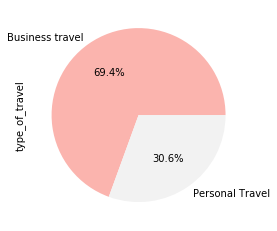

In [148]:
# Count the occurrences of each unique value in the 'type_of_travel' column and creat pie chart repressent it
fig=df.type_of_travel.value_counts()
print(fig)############################
fig.plot(kind='pie',y='Type of travel',colormap="Pastel1", autopct="%.1f%%")

Female    13172
Male      12804
Name: gender, dtype: int64


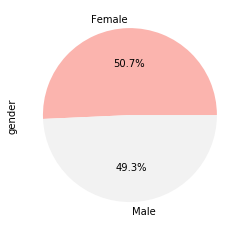

In [149]:
# Count the occurrences of each unique value in the 'gender' column and creat pie chart repressent it
fig=df.gender.value_counts()
print(fig)############################
fig.plot(kind='pie',y='Gender',colormap="Pastel1", autopct="%.1f%%")

In [203]:
# Count the occurrences of each unique value in the 'customer_type' column and creat histogram chart repressent it
df.customer_type.value_counts() ###############################
px.histogram(df,x='customer_type',histfunc='count',color='satisfaction',color_discrete_sequence=px.colors.qualitative.Pastel1,title='Distribution of Customer type by Satisfaction')

In [127]:
df.gender.value_counts() ###############################
px.histogram(df,x='gender',histfunc='count',color='satisfaction',color_discrete_sequence=px.colors.qualitative.Pastel1)

'''Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu,
GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1,
Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples,
Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r,
Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r,
YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis,
cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth,
gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r,
gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r,
hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink,
pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, 
tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r,
twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r'''

gender  satisfaction           
Female  neutral or dissatisfied    7437
        satisfied                  5735
Male    neutral or dissatisfied    7136
        satisfied                  5668
Name: satisfaction, dtype: int64


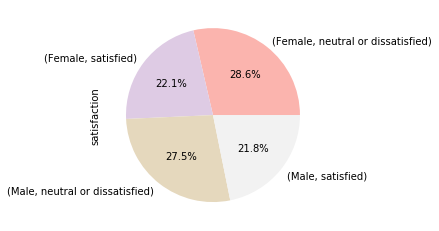

In [28]:
fig3=df.groupby('gender')['satisfaction'].value_counts()
print(fig3)##################3
fig3.plot(kind='pie',colormap="Pastel1", autopct="%.1f%%")

In [249]:
df2 = df.groupby('type_of_travel')['satisfaction'].value_counts().unstack().reset_index()

# Rename the columns for clarity
df2.columns = ['Type of Travel', 'Dissatisfied or neutral', 'Satisfied']

# Melt the DataFrame for easy plotting
df2_melted = pd.melt(df2, id_vars='Type of Travel', var_name='Satisfaction Level', value_name='Count')

# Create a pie chart using Plotly Express
fig = px.pie(df2_melted, names='Satisfaction Level', values='Count', title="Satisfaction Distribution by Type of Travel",
             color='Satisfaction Level', color_discrete_sequence=px.colors.qualitative.Pastel1,
             facet_col='Type of Travel', facet_col_wrap=2,hole=.3)
fig.show()


type_of_travel   satisfaction             class   
Business travel  neutral or dissatisfied  Eco         3469
                                          Business    3342
                                          Eco Plus     617
                 satisfied                Business    8637
                                          Eco         1578
                                          Eco Plus     395
Personal Travel  neutral or dissatisfied  Eco         5853
                                          Eco Plus     825
                                          Business     467
                 satisfied                Eco          664
                                          Eco Plus      80
                                          Business      49
Name: class, dtype: int64


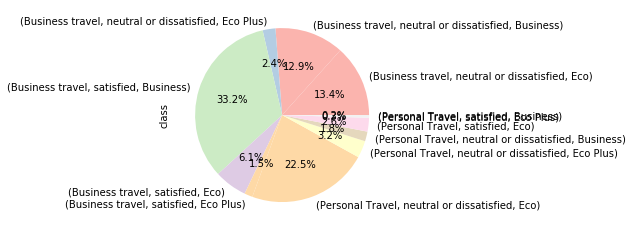

In [63]:
fig4=df.groupby(['type_of_travel','satisfaction'])['class'].value_counts() #######################
print(fig4)
name=list(df.type_of_travel.unique())
fig4.plot(kind='pie',colormap="Pastel1", autopct="%.1f%%")



In [251]:
fig4 = df.groupby(['type_of_travel', 'satisfaction', 'class']).size().reset_index(name='Count')

# Create a stacked bar chart using Plotly Express
fig = px.bar(fig4, x='type_of_travel', y='Count', color='satisfaction', facet_col='class',
             labels={'Count': 'Number of Passengers'},
             title="Passenger Distribution by Type of Travel, Satisfaction, and Class",
             color_discrete_sequence=px.colors.qualitative.Pastel1)

# Show the plot
fig.show()

In [255]:
fig4 = df.groupby(['total_points', 'satisfaction']).size().reset_index(name='Count')

# Create a bar chart for each 'total_points'
fig = px.bar(fig4, x='total_points', y='Count', color='satisfaction', 
             labels={'Count': 'Number of Passengers'},
             title="Satisfaction Distribution by Total Points",
             color_discrete_sequence=px.colors.qualitative.Pastel1)

# Show the plot
fig.show()

In [143]:
df3=df.groupby(['type_of_travel','gender'])['total_points'].sum().reset_index()
print(df3)
px.histogram(df3,y='total_points',x='type_of_travel',histfunc='sum',color='gender',color_discrete_sequence=px.colors.qualitative.Pastel1,marginal="box")

    type_of_travel  gender  total_points
0  Business travel  Female        398323
1  Business travel    Male        376911
2  Personal Travel  Female        156987
3  Personal Travel    Male        161212


In [144]:
maxTotalPoints=14*5
maxTotalPoints

70

In [145]:
df['percentage']=(df.total_points/maxTotalPoints)*100

In [146]:
df

gender      customer_type  age   type_of_travel     class  \
0      Female     Loyal Customer   52  Business travel       Eco   
1      Female     Loyal Customer   36  Business travel  Business   
2        Male  disloyal Customer   20  Business travel       Eco   
3        Male     Loyal Customer   44  Business travel  Business   
4      Female     Loyal Customer   49  Business travel       Eco   
...       ...                ...  ...              ...       ...   
25971    Male  disloyal Customer   34  Business travel  Business   
25972    Male     Loyal Customer   23  Business travel  Business   
25973  Female     Loyal Customer   17  Personal Travel       Eco   
25974    Male     Loyal Customer   14  Business travel  Business   
25975  Female     Loyal Customer   42  Personal Travel       Eco   

       flight_distance  inflight_wifi_service  arrival_time_convenient  \
0                  160                      5                        4   
1                 2863                      1                        1   
2                  192                      2                        0   
3                 3377                      0                        0   
4                 1182                      2                        3   
...                ...                    ...                      ...   
25971              526                      3                        3   
25972              646                      4                        4   
25973              828                      2                        5   
25974             1127                      3                        3   
25975              264                      2                        5   

       ease_of_online_booking  gate_location  ...  inflight_entertainment  \
0                           3              4  ...                       5   
1                           3              1  ...                       4   
2                           2              4  ...                       2   
3                           0              2  ...                       1   
4                           4              3  ...                       2   
...                       ...            ...  ...                     ...   
25971                       3              1  ...                       4   
25972                       4              4  ...                       4   
25973                       1              5  ...                       2   
25974                       3              3  ...                       4   
25975                       2              5  ...                       1   

       on_board_service  leg_room_service  baggage_handling  checkin_service  \
0                     5                 5                 5                2   
1                     4                 4                 4                3   
2                     4                 1                 3                2   
3                     1                 1                 1                3   
4                     2                 2                 2                4   
...                 ...               ...               ...              ...   
25971                 3                 2                 4                4   
25972                 4                 5                 5                5   
25973                 4                 3                 4                5   
25974                 3                 2                 5                4   
25975                 1                 2                 1                1   

       inflight_service  cleanliness             satisfaction  total_points  \
0                     5            5                satisfied            56   
1                     4            5                satisfied            45   
2                     2            2  neutral or dissatisfied            28   
3                     1            4                satisfied            22   
4                   

In [74]:
fig = px.histogram(
    df,
    x='age',
    color='satisfaction',
    facet_col='satisfaction',
    marginal='rug', 
    nbins=25,
    title='Distribution of Age by Satisfaction',
    color_discrete_sequence=px.colors.qualitative.Pastel1
)

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Frequency',
)

fig.show()

In [82]:
df.groupby('gender')['percentage'].value_counts().sort_values(ascending=False)

gender  percentage
Female  61.428571     561
        65.714286     558
Male    61.428571     555
        57.142857     552
        58.571429     550
                     ... 
        21.428571       2
        22.857143       2
        92.857143       1
Female  20.000000       1
        24.285714       1
Name: percentage, Length: 102, dtype: int64

In [36]:
df.loc[df.gender=='Female','satisfaction'].value_counts()

neutral or dissatisfied    7437
satisfied                  5735
Name: satisfaction, dtype: int64

In [37]:
satis=df.loc[df.gender=='Male','satisfaction'].value_counts()
satis


neutral or dissatisfied    7136
satisfied                  5668
Name: satisfaction, dtype: int64

In [39]:
df['age'].corr(df['total_points'])

0.08318701195464433

In [40]:
df.groupby('satisfaction')['percentage'].value_counts().sort_values(ascending=False)

satisfaction             percentage
neutral or dissatisfied  55.714286     755
                         52.857143     742
                         57.142857     737
                         54.285714     717
                         58.571429     689
                                      ... 
satisfied                25.714286       2
                         21.428571       2
                         22.857143       2
neutral or dissatisfied  87.142857       1
satisfied                20.000000       1
Name: percentage, Length: 98, dtype: int64

In [256]:
df["satisfaction"]=[1 if e=="satisfied" else 0 for e in df.satisfaction]

In [257]:
df

gender      customer_type  age   type_of_travel     class  \
0      Female     Loyal Customer   52  Business travel       Eco   
1      Female     Loyal Customer   36  Business travel  Business   
2        Male  disloyal Customer   20  Business travel       Eco   
3        Male     Loyal Customer   44  Business travel  Business   
4      Female     Loyal Customer   49  Business travel       Eco   
...       ...                ...  ...              ...       ...   
25971    Male  disloyal Customer   34  Business travel  Business   
25972    Male     Loyal Customer   23  Business travel  Business   
25973  Female     Loyal Customer   17  Personal Travel       Eco   
25974    Male     Loyal Customer   14  Business travel  Business   
25975  Female     Loyal Customer   42  Personal Travel       Eco   

       flight_distance  inflight_wifi_service  arrival_time_convenient  \
0                  160                      5                        4   
1                 2863                      1                        1   
2                  192                      2                        0   
3                 3377                      0                        0   
4                 1182                      2                        3   
...                ...                    ...                      ...   
25971              526                      3                        3   
25972              646                      4                        4   
25973              828                      2                        5   
25974             1127                      3                        3   
25975              264                      2                        5   

       ease_of_online_booking  gate_location  ...  inflight_entertainment  \
0                           3              4  ...                       5   
1                           3              1  ...                       4   
2                           2              4  ...                       2   
3                           0              2  ...                       1   
4                           4              3  ...                       2   
...                       ...            ...  ...                     ...   
25971                       3              1  ...                       4   
25972                       4              4  ...                       4   
25973                       1              5  ...                       2   
25974                       3              3  ...                       4   
25975                       2              5  ...                       1   

       on_board_service  leg_room_service  baggage_handling  checkin_service  \
0                     5                 5                 5                2   
1                     4                 4                 4                3   
2                     4                 1                 3                2   
3                     1                 1                 1                3   
4                     2                 2                 2                4   
...                 ...               ...               ...              ...   
25971                 3                 2                 4                4   
25972                 4                 5                 5                5   
25973                 4                 3                 4                5   
25974                 3                 2                 5                4   
25975                 1                 2                 1                1   

       inflight_service  cleanliness  satisfaction  total_points  percentage  
0                     5            5             1            56   80.000000  
1                     4            5             1            45   64.285714  
2                     2            2             0            28   40.000000  
3                     1            4             1            22   31.428571  
4                   

In [259]:
df[["cleanliness","satisfaction"]].groupby(["cleanliness"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

cleanliness  satisfaction
5            5      0.627030
4            4      0.535052
3            3      0.437923
2            2      0.211253
1            1      0.199941
0            0      0.000000

In [261]:
cleanliness_satisfaction_mean = df[["cleanliness", "satisfaction"]].groupby(["cleanliness"], as_index=False).mean().sort_values(by="satisfaction", ascending=False)

# Create a bar chart using Plotly Express
fig = px.bar(cleanliness_satisfaction_mean, x='cleanliness', y='satisfaction', 
             title="Mean Satisfaction Across Cleanliness Levels",
             labels={'satisfaction': 'Mean Satisfaction'},
              color_discrete_sequence=px.colors.qualitative.Pastel1)

# Show the plot
fig.show()

In [264]:
df[["inflight_wifi_service","satisfaction"]].groupby(["inflight_wifi_service"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

inflight_wifi_service  satisfaction
0                      0      0.997540
5                      5      0.987877
4                      4      0.607910
1                      1      0.339127
3                      3      0.256926
2                      2      0.241448

In [266]:
wifi_satisfaction_mean = df[["inflight_wifi_service", "satisfaction"]].groupby(["inflight_wifi_service"], as_index=False).mean().sort_values(by="satisfaction", ascending=False)

# Create a bar chart using Plotly Express
fig = px.bar(wifi_satisfaction_mean, x='inflight_wifi_service', y='satisfaction', 
             title="Mean Satisfaction Across Inflight WiFi Service Levels",
             labels={'satisfaction': 'Mean Satisfaction'},
              color_discrete_sequence=px.colors.qualitative.Pastel1)

# Show the plot
fig.show()

In [269]:
df[["seat_comfort","satisfaction"]].groupby(["seat_comfort"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

seat_comfort  satisfaction
4             5      0.655801
3             4      0.556876
1             2      0.233756
2             3      0.224309
0             1      0.223871

In [273]:
seatComfort_satisfaction_mean = df[["seat_comfort", "satisfaction"]].groupby(["seat_comfort"], as_index=False).mean().sort_values(by="satisfaction", ascending=False)

# Create a bar chart using Plotly Express
fig = px.bar(seatComfort_satisfaction_mean, x='seat_comfort', y='satisfaction', 
             title="Mean Satisfaction Across Seat comfort Service Levels",
             labels={'satisfaction': 'Mean Satisfaction'},
              color_discrete_sequence=px.colors.qualitative.Pastel1)

# Show the plot
fig.show()

In [276]:
df[["inflight_entertainment","satisfaction"]].groupby(["inflight_entertainment"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

inflight_entertainment  satisfaction
5                       5      0.659296
4                       4      0.608578
3                       3      0.285564
2                       2      0.210113
1                       1      0.150141
0                       0      0.000000

In [280]:
inflight_entertainment_satisfaction_mean = df[["inflight_entertainment", "satisfaction"]].groupby(["inflight_entertainment"], as_index=False).mean().sort_values(by="satisfaction", ascending=False)

# Create a bar chart using Plotly Express
fig2 = px.bar(inflight_entertainment_satisfaction_mean, x='inflight_entertainment', y='satisfaction', 
             title="Mean Satisfaction Across Inflight entertainment Service Levels",
             labels={'satisfaction': 'Mean Satisfaction'},
              color_discrete_sequence=px.colors.qualitative.Pastel1)

# Show the plot
fig2.show()

In [281]:
df[["arrival_time_convenient","satisfaction"]].groupby(["arrival_time_convenient"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)


arrival_time_convenient  satisfaction
1                        1      0.505497
0                        0      0.502534
3                        3      0.445603
2                        2      0.442091
5                        5      0.422341
4                        4      0.392011

In [283]:
arrival_time_convenient_satisfaction_mean = df[["arrival_time_convenient", "satisfaction"]].groupby(["arrival_time_convenient"], as_index=False).mean().sort_values(by="satisfaction", ascending=False)

# Create a bar chart using Plotly Express
fig2 = px.bar(arrival_time_convenient_satisfaction_mean, x='arrival_time_convenient', y='satisfaction', 
             title="Mean Satisfaction Across Arrival time convenient Levels",
             labels={'satisfaction': 'Mean Satisfaction'},
              color_discrete_sequence=px.colors.qualitative.Pastel1)

# Show the plot
fig2.show()

In [284]:
foodAndDrink_satisfaction_mean = df[["food_and_drink", "satisfaction"]].groupby(["food_and_drink"], as_index=False).mean().sort_values(by="satisfaction", ascending=False)

# Create a bar chart using Plotly Express
fig2 = px.bar(foodAndDrink_satisfaction_mean, x='food_and_drink', y='satisfaction', 
             title="Mean Satisfaction Across Food and drink Levels",
             labels={'satisfaction': 'Mean Satisfaction'},
              color_discrete_sequence=px.colors.qualitative.Pastel1)

# Show the plot
fig2.show()

In [96]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

fig = px.box(df, y='age', title='Boxplot of Age with Outliers Highlighted',color_discrete_sequence=px.colors.qualitative.Pastel1)

# Highlight outliers in red using the scatter plot
fig.update_traces(marker=dict(color='gray'), selector=dict(mode='markers'))

fig.show()

In [106]:
Q1 = df['flight_distance'].quantile(0.25)
Q3 = df['flight_distance'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['flight_distance'] < lower_bound) | (df['flight_distance'] > upper_bound)]

fig = px.box(df, y='flight_distance', title='Boxplot of flight distance with Outliers Highlighted',color_discrete_sequence=px.colors.qualitative.Pastel1)



fig.show()

In [43]:
df.columns

Index(['id', 'gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service', 'arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness', 'satisfaction',
       'total_points', 'percentage'],
      dtype='object')

# Dashbord

In [275]:


# Create a Dash web application
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div(children=[
    html.H1(children='Passenger Satisfaction Dashboard'),
    

    html.Div(children='''
        Analysis of passenger satisfaction data.
    '''),
    html.Div(children='''
    
             
             '''),

    # Dropdown menu for selecting satisfaction metric
    dcc.Dropdown(
        id='satisfaction-metric',
        options=[
            {'label': 'Inflight Entertainment', 'value': 'inflight_entertainment'},
            {'label': 'Seat Comfort', 'value': 'seat_comfort'},
            {'label': 'Food and Drink', 'value': 'food_and_drink'}
            
        ],
        value='inflight_entertainment',  # Default selection
        style={'width': '50%'}
    ),

    dcc.Graph(
        id='satisfaction-distribution',
    ),

    dcc.Graph(
        id='satisfaction-age',
    ),

    dcc.Graph(
        id='satisfaction-distance',
    ),
   
  
])

# Define callback to update graphs based on dropdown selection
@app.callback(
    [Output('satisfaction-distribution', 'figure'),
     Output('satisfaction-age', 'figure'),
     Output('satisfaction-distance', 'figure'),
   
  ],
    
    [Input('satisfaction-metric', 'value'),
    ]
)
def update_graphs(selected_metric):
    # Create histograms and box plots based on the selected metric
    distribution_fig = px.histogram(df, x=selected_metric, title=f'Distribution of {selected_metric.capitalize()} Satisfaction',color='satisfaction',color_discrete_sequence=px.colors.qualitative.Pastel1)
    age_fig = px.box(df, x=selected_metric, y='age', title=f'{selected_metric.capitalize()} Satisfaction by Age Group',color_discrete_sequence=px.colors.qualitative.Pastel1,color='satisfaction')
    distance_fig = px.box(df, x=selected_metric, y='flight_distance', title=f'{selected_metric.capitalize()} Satisfaction by Flight Distance',color='gender',color_discrete_sequence=px.colors.qualitative.Pastel1)
  

    return distribution_fig, age_fig, distance_fig
# Run the application
if __name__ == '__main__':
    app.run_server(debug=True)